Goal of exercise: predict with >73% accuracy

In [207]:
#set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score



# load dataset
data = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [195]:
def run_logistic(feature_cols, data, plot = False):
    
    print('Logistic regression')
    #set up data x and y
    X = data[feature_cols]
    y = data.Y 
    # # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

    # instantiate the model (using the default parameters)
    logreg = LogisticRegression(random_state=16)

    # fit the model with data
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

    if plot:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
    else:
        pass
#         print('Confusion matrix:')
#         print(cnf_matrix)
    
    #precision and accuracy

    #target_names = ['unhappy', 'happy']
    #print(classification_report(y_test, y_pred, target_names=target_names))
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)

Modifying logistic regression to improve accuracy

In [177]:
def run_featureeng(feature_cols, data):
    print('Logistic regression with feature engineering')
    #set up data x and y
    #feature engineering
    poly = PolynomialFeatures(degree=2)
    X = poly.fit_transform(data[feature_cols])
    y = data.Y 
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

    # Train the Logistic Regression classifier
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    
def run_featurescal(feature_cols, data):
    print('Logistic regression with feature scaling')
    #set up data x and y
    #feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(data[feature_cols])
    y = data.Y 
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

    # Train the Logistic Regression classifier
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)   

In [184]:
feature_cols = ['X1', 'X2', 'X3','X4','X5','X6']
run_logistic(feature_cols, data)
run_featureeng(feature_cols, data)
run_featurescal(feature_cols, data)

Logistic regression
Accuracy: 0.71875
Logistic regression with feature engineering
Accuracy: 0.59375
Logistic regression with feature scaling
Accuracy: 0.71875


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#comparing some other algorithms
feature_cols = ['X1', 'X2', 'X3','X4','X5','X6']

#Non scaled features
X1 = data[feature_cols]
# Scale the features using StandardScaler
scaler = StandardScaler()
X2 = scaler.fit_transform(data[feature_cols])

y = data.Y 

# Split the data into training and testing sets for scaled and non scaled
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.25, random_state=16)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.25, random_state=16)

# Define the hyperparameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100]}

# Create a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print(f"Logistic regression accuracy: {accuracy}")

clf_logistic = LogisticRegression()

# Create a KNN classifier
clf = KNeighborsClassifier()
clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print(f"KNN accuracy: {accuracy}")

clf_knn = KNeighborsClassifier()

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print(f"Decision tree accuracy: {accuracy}")

clf_dt = DecisionTreeClassifier()

# Create a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print(f"Random forest accuracy: {accuracy}")

clf_rf = RandomForestClassifier()

#Create a Gradient Boosting classifier
clf = GradientBoostingClassifier()
clf.fit(X1_train, y1_train)
y_pred = clf.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
print(f"Gradient Boosting accuracy: {accuracy}")

clf_gb = GradientBoostingClassifier()

print("\nWith grid search:")
#not scaled
# Use GridSearchCV to perform a model selection
grid = GridSearchCV(clf_logistic, param_grid, scoring='accuracy', cv=5)
grid.fit(X1_train, y1_train)

# Print the best hyperparameters and the best accuracy score
print("Best hyperparameters for Logistic Regression (not scaled): ", grid.best_params_)
print("Best accuracy score for Logistic Regression (not scaled): ", grid.best_score_)

#scaled
# Use GridSearchCV to perform a model selection
grid = GridSearchCV(clf_logistic, param_grid, scoring='accuracy', cv=5)
grid.fit(X2_train, y2_train)

# Print the best hyperparameters and the best accuracy score
print("Best hyperparameters for Logistic Regression (scaled): ", grid.best_params_)
print("Best accuracy score for Logistic Regression (scaled): ", grid.best_score_)

# Repeat the process for each classifier
#not scaled
grid = GridSearchCV(clf_knn, {'n_neighbors': range(1, 31)}, scoring='accuracy', cv=5)
grid.fit(X1_train, y1_train)
print("Best hyperparameters for KNN (not scaled): ", grid.best_params_)
print("Best accuracy score for KNN (not scaled): ", grid.best_score_)

#scaled
grid = GridSearchCV(clf_knn, {'n_neighbors': range(1, 31)}, scoring='accuracy', cv=5)
grid.fit(X2_train, y2_train)
print("Best hyperparameters for KNN (scaled): ", grid.best_params_)
print("Best accuracy score for KNN (scaled): ", grid.best_score_)

#not scaled
grid = GridSearchCV(clf_dt, {'max_depth': range(1, 11)}, scoring='accuracy', cv=5)
grid.fit(X1_train, y1_train)
print("Best hyperparameters for Decision Tree (not scaled): ", grid.best_params_)
print("Best accuracy score for Decision Tree (not scaled): ", grid.best_score_)

#scaled
grid = GridSearchCV(clf_dt, {'max_depth': range(1, 11)}, scoring='accuracy', cv=5)
grid.fit(X2_train, y2_train)
print("Best hyperparameters for Decision Tree (scaled): ", grid.best_params_)
print("Best accuracy score for Decision Tree (scaled): ", grid.best_score_)

#not scaled
grid = GridSearchCV(clf_rf, {'n_estimators': [10, 50, 100, 200], 'max_depth': range(1, 11)}, scoring='accuracy', cv=5)
grid.fit(X1_train, y1_train)
print("Best hyperparameters for Random Forest (not scaled): ", grid.best_params_)
print("Best accuracy score for Random Forest (not scaled): ", grid.best_score_)

#scaled
grid = GridSearchCV(clf_rf, {'n_estimators': [10, 50, 100, 200], 'max_depth': range(1, 11)}, scoring='accuracy', cv=5)
grid.fit(X2_train, y2_train)
print("Best hyperparameters for Random Forest (scaled): ", grid.best_params_)
print("Best accuracy score for Random Forest (scaled): ", grid.best_score_)

#not scaled
grid = GridSearchCV(clf_gb, {'n_estimators': [10, 50, 100, 200], 'max_depth': range(1, 11)}, scoring='accuracy', cv=5)
grid.fit(X1_train, y1_train)
print("Best hyperparameters for Gradient Boosting (not scaled): ", grid.best_params_)
print("Best accuracy score for Gradient Boosting (not scaled): ", grid.best_score_)

#scaled
grid = GridSearchCV(clf_gb, {'n_estimators': [10, 50, 100, 200], 'max_depth': range(1, 11)}, scoring='accuracy', cv=5)
grid.fit(X2_train, y2_train)
print("Best hyperparameters for Gradient Boosting (scaled): ", grid.best_params_)
print("Best accuracy score for Gradient Boosting(scaled): ", grid.best_score_)


Logistic regression accuracy: 0.71875
KNN accuracy: 0.46875
Decision tree accuracy: 0.5
Random forest accuracy: 0.5625
Gradient Boosting accuracy: 0.59375

With grid search:
Best hyperparameters for Logistic Regression (not scaled):  {'C': 0.1}
Best accuracy score for Logistic Regression (not scaled):  0.5742690058479532
Best hyperparameters for Logistic Regression (scaled):  {'C': 0.1}
Best accuracy score for Logistic Regression (scaled):  0.5637426900584795
Best hyperparameters for KNN (not scaled):  {'n_neighbors': 11}
Best accuracy score for KNN (not scaled):  0.6052631578947368
Best hyperparameters for KNN (scaled):  {'n_neighbors': 11}
Best accuracy score for KNN (scaled):  0.6374269005847953
Best hyperparameters for Decision Tree (not scaled):  {'max_depth': 3}
Best accuracy score for Decision Tree (not scaled):  0.6169590643274854
Best hyperparameters for Decision Tree (scaled):  {'max_depth': 3}
Best accuracy score for Decision Tree (scaled):  0.6169590643274854


In [208]:
def run_svc(feature_cols, data, plot = True):
    #set up data x and y
    X = data[feature_cols]
    y = data.Y 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # Train the SVM classifier
    clf = SVC()
    clf.fit(X_train, y_train)

    # Predict the target values for the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)

feature_cols = ['X1', 'X2', 'X3','X4','X5','X6']
run_svc(feature_cols, data)

Accuracy: 0.6875


In [209]:
def run_NB(feature_cols, data, plot = True):
    #set up data x and y
    X = data[feature_cols]
    y = data.Y 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    # Train the Gaussian Naive Bayes classifier
    clf = GaussianNB()
    clf.fit(X_train, y_train)

    # Predict the target values for the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)
feature_cols = ['X1', 'X2', 'X3','X4','X5','X6']
run_NB(feature_cols, data)

Accuracy: 0.5625


In [210]:
def run_MLPC(feature_cols, data, plot = True):
    #set up data x and y
    X = data[feature_cols]
    y = data.Y 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # Train the Neural Network classifier
    clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
    clf.fit(X_train, y_train)

    # Predict the target values for the test set
    y_pred = clf.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)
feature_cols = ['X1', 'X2', 'X3','X4','X5','X6']
run_MLPC(feature_cols, data)

Accuracy: 0.40625


The results show that using logistic regressin we can achieve highest accuracy but it is still below 73%

Looking at individual features:

<AxesSubplot:xlabel='X1', ylabel='Count'>

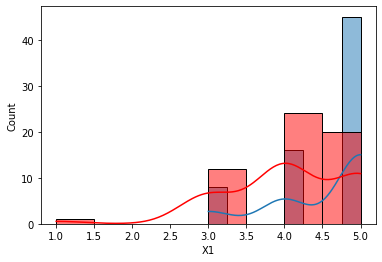

In [211]:
import seaborn as sns

happy = data[data['Y'] == 1]
unhappy = data[data['Y'] == 0]
# create distribution plot
sns.histplot(data=happy, x='X1', kde=True)
sns.histplot(data=unhappy, x='X1', kde=True, color = 'r')



In [127]:
#filter features by importance

# Perform feature selection using the chi2 method
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the feature importances based on the chi2 scores
scores = selector.scores_

# Create a dataframe with the feature names and their importances
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': scores})

# Sort the dataframe by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances)


  Feature  Importance
4      X5    2.273286
0      X1    1.449041
2      X3    0.900104
5      X6    0.541070
3      X4    0.106194
1      X2    0.036161


Using SelectKBest and Chi squared as a feature selection approach we can see the order of importance of the questions.



In [128]:
def remove_features(features, data):
    features.reverse()
    for i in range(len(features)-1):
        print(f"Feature removed: {features[i]}")
        test_features = features[i+1:]
        run_logistic(test_features, data, False)

In [129]:
features_byimp = list(importances.Feature) #removed X2 based on above results and rerun logisitc regression
#run_logistic(new_feature_cols, data, plot = True)
remove_features(features_byimp, data)

Feature removed: X2
Accuracy: 0.6875
Feature removed: X4
Accuracy: 0.6875
Feature removed: X6
Accuracy: 0.65625
Feature removed: X3
Accuracy: 0.65625
Feature removed: X1
Accuracy: 0.625
